In [68]:
import pandas as pd
import numpy as np

In [69]:
df=pd.read_csv('gsol3.csv')
df.head(63)

,Unnamed: 0,Cultivar ID,Sequences,Subpopulation,PlantHeight,Yield
0,0,C001,GCTTTTCCC,Indica I,144.13,24.13
1,1,C002,GCCTTTCCC,VI/Aromatic,177.62,15.18
2,2,C003,GCTGTACTT,Japonica Intermediate,141.57,24.54
3,3,C004,GCTGAACTC,Temperate Japonica,140.40,18.82
4,4,C005,GCTTAATTC,Tropical Japonica,163.33,22.50
...,...,...,...,...,...,...
58,58,C059,GCTTTATCT,Indica I,113.43,24.25
59,59,C060,GCTTTATCC,Indica I,114.73,25.52
60,60,C061,GCTGTATTT,Indica II,109.37,25.10
61,61,C062,GCTGTATTT,Indica I,105.50,14.31


In [70]:
del df["Unnamed: 0"]
df

,Cultivar ID,Sequences,Subpopulation,PlantHeight,Yield
0,C001,GCTTTTCCC,Indica I,144.13,24.13
1,C002,GCCTTTCCC,VI/Aromatic,177.62,15.18
2,C003,GCTGTACTT,Japonica Intermediate,141.57,24.54
3,C004,GCTGAACTC,Temperate Japonica,140.40,18.82
4,C005,GCTTAATTC,Tropical Japonica,163.33,22.50
...,...,...,...,...,...
524,W326,GCTGTACTC,Japonica Intermediate,155.40,24.96
525,W327,ACTGTACTC,Temperate Japonica,89.80,35.33
526,W328,ACTGTACTT,Intermediate,117.40,7.69
527,W329,GCTGTATTC,Tropical Japonica,147.40,34.71


In [71]:
with open('sequence.fasta','w') as f:
    for i in range(len(df['Cultivar ID'])):
        st=""
        st=">"+df['Cultivar ID'][i]+"\n"+df["Sequences"][i]
        f.write(st+"\n\n") 

In [6]:
import subprocess

inpf="sequence.fasta"
outf="outf.fasta"

muscom=["/usr/local/bin/muscle5.1.macos_arm64","-align",inpf,"-output",outf]
process=subprocess.Popen(muscom,stdout=subprocess.PIPE,stderr=subprocess.PIPE)
stdout,stderr=process.communicate()
print(stdout.decode())
print(stderr.decode())



muscle 5.1.osxarm64 [ef62d8-dirty]  8.6Gb RAM, 8 cores
Built Jan 15 2022 11:59:50
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 529 seqs, avg length 9, max 9

00:00 24Mb   CPU has 8 cores, running 8 threads
00:00 472Mb   100.0% Calc posteriors  
00:06 723Mb   100.0% Consistency (1/2)  
00:12 913Mb   100.0% Consistency (2/2)  
00:12 915Mb   100.0% UPGMA5           
00:15 919Mb   100.0% Refining



In [7]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator,DistanceTreeConstructor
alignment = AlignIO.read("outf.fasta","fasta")

#Calculate distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the guide tree using UPGMA algorithm
constructor = DistanceTreeConstructor(calculator,"upgma")
tree = constructor.build_tree(alignment)

tree_file = "tree.nwk" # converting it into a newick file
Phylo.write(tree, tree_file, "newick")

1

In [8]:
from Bio import AlignIO
algn=AlignIO.read("outf.fasta","fasta")
algn

<<class 'Bio.Align.MultipleSeqAlignment'> instance (529 records of length 9) at 10beee5f0>

In [72]:
from Bio.Phylo.TreeConstruction import DistanceCalculator,DistanceTreeConstructor

cal=DistanceCalculator("identity")
dm=cal.get_distance(algn)
print(algn)

cont=DistanceTreeConstructor(cal, "upgma")
tree=cont.build_tree(algn)
 # converting it into a newick file

Alignment with 529 rows and 9 columns
GCTGTACTC W127
GCTTTATTT W040
GCTTTTTCC C128
ACCGATCTT W128
GCTGTTTTT W299
GCCGTACTC W049
GCCGTATTT W146
ACTGTACTT W013
GCTGTATTT W161
GCTGTATTT W225
GCCTTATCC C076
ACTGAATTT W119
GCTGTATTT W118
GCTTTACTT W240
GCTGTATTT W044
GCTTTATTT W180
GCTTTATTT W308
GCCGTATTT W071
...
GCTTTATTT W271


In [73]:
tree=Phylo.read("tree.nwk","newick")
Phylo.draw_ascii(tree)

                       ___ W125
                    __|
                   |  |___ W155
                   |
                   |      , W120
                   |      |
                   |      | W226
               ____|      |
              |    |      | C119
              |    |      |
              |    |      | W087
              |    |      |
              |    |   ___| C051
              |    |  |   |
              |    |__|   | C014
              |       |
              |       |___ W119
              |
              |          ___ W003
              |        _|
              |       | |___ C063
              |       |
              |       |        , C120
              |       |        |
              |     __|      __| C172
              |    |  |     |  |
              |    |  |     |  | C149
              |    |  |     |
              |    |  |     |  , C012
       _______|    |  |_____|  |
      |       |    |        |  | W060
      |       |    |        |  |
      |    

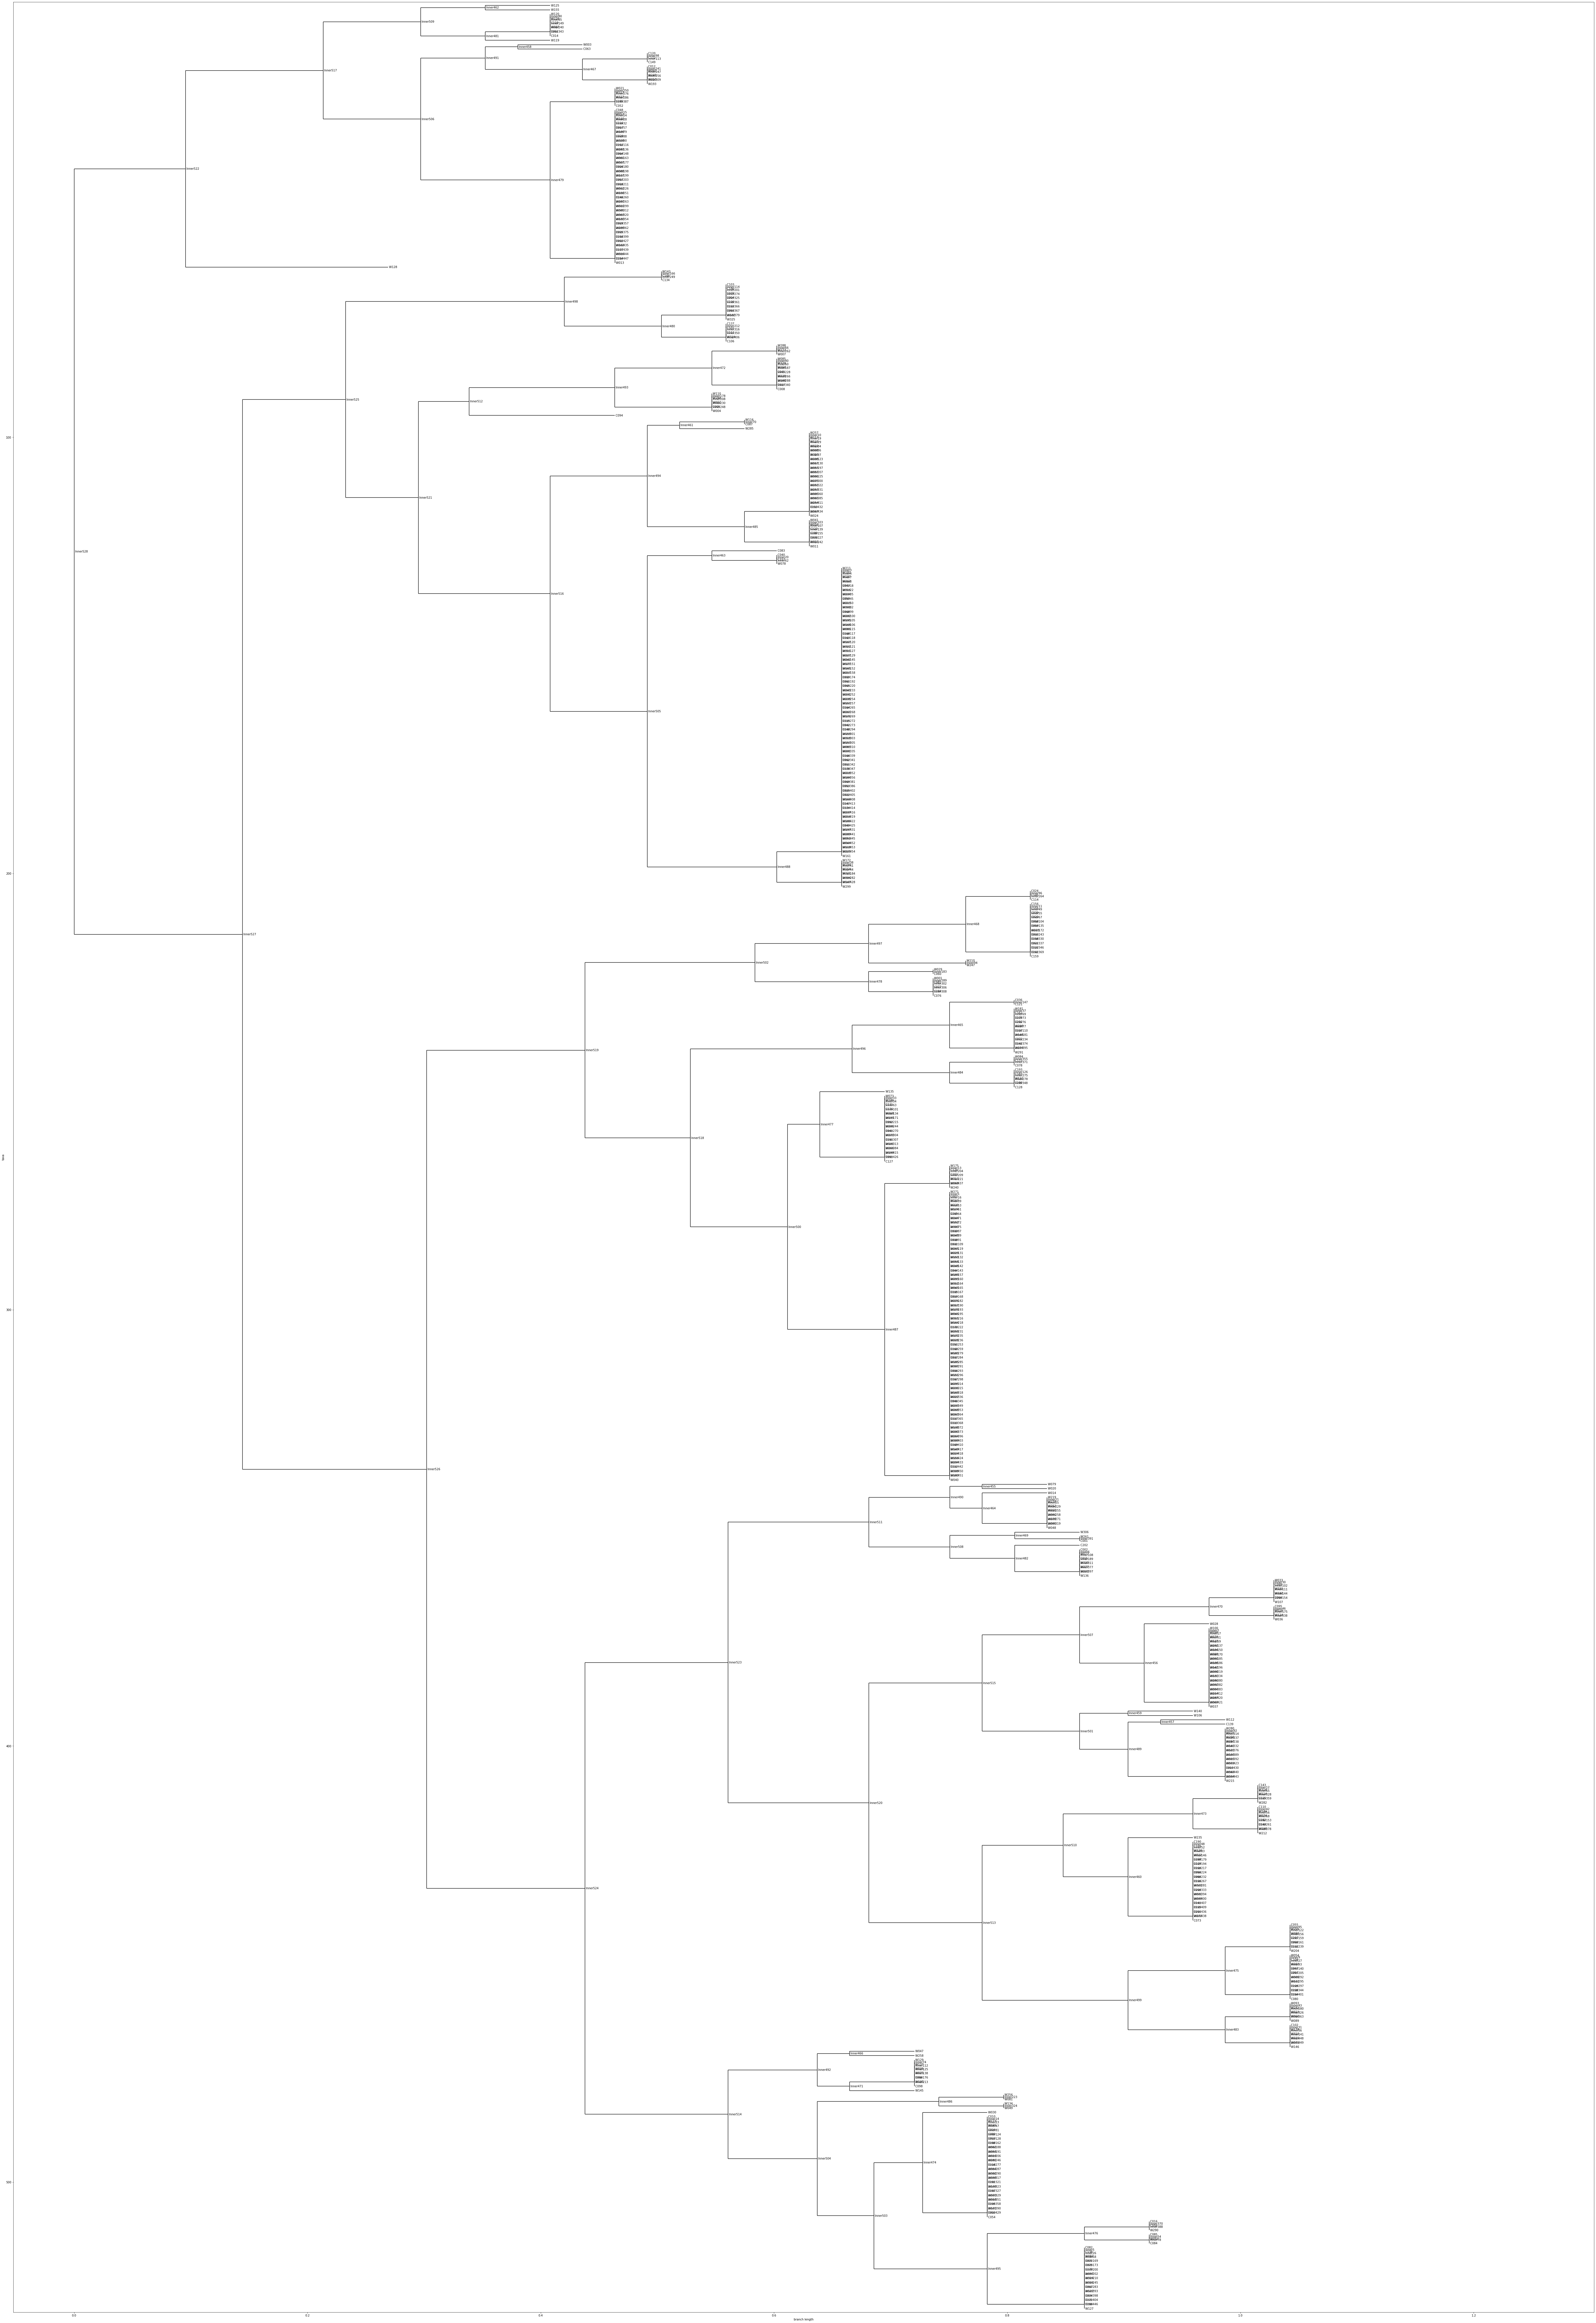

In [74]:
import matplotlib.pyplot as plt
# Set the figure size
fig, ax = plt.subplots(figsize=(100, 150))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)
plt.show()

In [75]:
from Bio import Phylo
# Get the tuple representation of the tree
tree_file=Phylo.read("tree.nwk","newick")
tree=tree_file
def get_tuple(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return (get_tuple(clade.clades[0]), get_tuple(clade.clades[1]))

tree_tuple = get_tuple(tree.clade)
print(tree_tuple)

((((('W125', 'W155'), (((((('W120', 'W226'), 'C119'), 'W087'), 'C051'), 'C014'), 'W119')), ((('W003', 'C063'), ((('C120', 'C172'), 'C149'), (((('C012', 'W060'), 'W249'), 'W250'), 'W193'))), ((((('W021', 'W323'), 'W327'), 'C185'), 'C052'), ((((((((((((((((((((((((((((((((((('C048', 'W052'), 'W160'), 'C116'), 'C017'), 'W109'), 'C028'), 'W328'), 'C152'), 'W283'), 'C064'), 'W061'), 'W027'), 'C026'), 'W088'), 'W117'), 'C057'), 'C018'), 'W012'), 'W158'), 'C146'), 'W207'), 'W010'), 'W305'), 'W063'), 'W130'), 'C029'), 'W209'), 'C035'), 'C150'), 'C032'), 'W162'), 'C177'), 'W016'), 'C154'), 'W013')))), 'W128'), ((((('W143', 'C144'), 'C134'), ((((((((('C103', 'C196'), 'C079'), 'C004'), 'C130'), 'C133'), 'C093'), 'W102'), 'W325'), (((('C137', 'C101'), 'C111'), 'W319'), 'C106'))), (((((('W288', 'W273'), 'W007'), ((((((('W085', 'W329'), 'W260'), 'C045'), 'W239'), 'W188'), 'C027'), 'C008')), (((('W110', 'W284'), 'W002'), 'C005'), 'W004')), 'C094'), (((('W116', 'C087'), 'W285'), (((((((((((((((((((('W

In [77]:

fin=[]                           
s=str(tree_tuple)               
for i in range(len(s)-1):   
  if(i>0):
    i=k 
  if(i>=len(s)-1): 
    break
  c1=0 
  c2=0
  if(s[i]=='('):
      c1+=1
  flag=0 
  for j in range(i+1,len(s)):
    if(s[j]!='(' and s[j]!=')' and s[j]!=',' and s[j]!=" "):  
      flag+=1
    elif(s[j]==')'):
      if(c1==0 and flag>5):
        strr=s[j-7:j]
        fin.append(strr) 
        k=j+1
        break  
      elif(c1==0):
        k=j+1
        break
      else:
        c2+=1
        if(c1==c2):
          strr1=s[i+c1:j]
          fin.append(strr1)   
          k=j+1
          break
    else:
      if(s[j]=='(' and flag>5 and c1-c2>=1):
        strr2=s[i+(c1-c2):j]
        fin.append(strr2)    
        k=j
        break
      elif(s[j]=='(' and flag>5):  
        c1=1
        strr3=s[j-8:j-1]
        fin.append(strr3) 
        k=j
        break
      else: 
        if(s[j]=='('):
          c1+=1
        else:
          continue  
for i in range(len(fin)):
  fin[i] = fin[i].replace("(", "").replace(")", "").replace(",", "").replace("'", "")

cll=[]
for i in range(len(fin)):
  w=fin[i].split()
  res=",".join(w)
  w1=res.split(",")
  cll.append(w1)
cll
s = str(tree_tuple).replace(" ", "").replace("'", "")
non_characters = ["(",")", "'"]
clusters = []
i = 0
while i < len(s):
    if s[i] == "(":
        clusterOpen = i
        flag = 0
        i+=1
        while i < len(s):
            if s[i] not in non_characters:
                flag = 1
            if s[i] == "(" and flag == 1:
                break
            i+=1
        clusterClose = i-1
        cluster = s[clusterOpen:clusterClose].replace("(", "").replace(")", "").split(",")
        clusters.append(cluster)
len(clusters)



64

In [78]:
colums=["Clusters","Sequences"]
dfcl=pd.DataFrame(columns=colums)
dfcl

,Clusters,Sequences


In [141]:
dfcl=pd.DataFrame(cll).stack()
dfcl1=pd.DataFrame(dfcl,columns=['Cultivar ID'])
dfcl1.head(531)


Cultivar ID
0  0         W125
   1         W155
1  0         W120
   1         W226
   2         C119
...           ...
65 10        W122
   11        C074
   12        C171
   13        C186
   14        W127

[529 rows x 1 columns]

In [153]:
clst=[]
clid=[] 

for i in dfcl1.index:clst.append(i[0])
for i in dfcl1['Cultivar ID']:clid.append(i)

In [166]:
seq=[]
sbp=[]
plh=[]
ply=[]
for i in newf['CultivarID']:
    a=(df[df['Cultivar ID']==i].values.flatten())
    seq.append(a[1])
    sbp.append(a[2])
    plh.append(a[3])
    ply.append(a[4])



In [173]:
newf=pd.DataFrame(columns=['Clusters','CultivarID','Sequence','Subpopulation','PlantHeight','Yield'])
for values in zip(clst,clid,seq,sbp,plh,ply):
    newf= newf.append(pd.Series(values, index=newf.columns), ignore_index=True)
newf

/var/folders/vr/0kr5ydpx4_jb33rs0cspg6s00000gn/T/ipykernel_1332/4191433999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newf= newf.append(pd.Series(values, index=newf.columns), ignore_index=True)
/var/folders/vr/0kr5ydpx4_jb33rs0cspg6s00000gn/T/ipykernel_1332/4191433999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newf= newf.append(pd.Series(values, index=newf.columns), ignore_index=True)
/var/folders/vr/0kr5ydpx4_jb33rs0cspg6s00000gn/T/ipykernel_1332/4191433999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newf= newf.append(pd.Series(values, index=newf.columns), ignore_index=True)
/var/folders/vr/0kr5ydpx4_jb33rs0cspg6s00000gn/T/ipykernel_1332/4191433999.py:3: FutureWarning: The frame.append method is d

,Clusters,CultivarID,Sequence,Subpopulation,PlantHeight,Yield
0,0,W125,ACTGTTCTT,Intermediate,152.00,25.54
1,0,W155,ACTGTTTTT,Indica Intermediate,98.40,44.83
2,1,W120,ACTGTATTT,Temperate Japonica,109.60,19.56
3,1,W226,ACTGTATTT,Temperate Japonica,93.20,34.59
4,1,C119,ACTGTATTT,Temperate Japonica,86.17,17.49
...,...,...,...,...,...,...
524,65,W122,GCTGTACTC,Japonica Intermediate,169.80,25.77
525,65,C074,GCTGTACTC,Temperate Japonica,143.65,17.51
526,65,C171,GCTGTACTC,Temperate Japonica,140.61,22.73
527,65,C186,GCTGTACTC,Japonica Intermediate,180.00,28.61


In [176]:
newf.to_csv('gsol4.csv')